In [1]:
from pathlib import Path
from dataclasses import dataclass
import sys

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

%matplotlib inline
%load_ext autoreload
%autoreload 2


@dataclass
class Config:
    REPO_ROOT: Path = Path("../../")
    data_dir: Path = REPO_ROOT / "data"
    seed: int = 42
    test_size: float = 0.2
    n_samples: int = 300


config = Config()
sys.path.append(str(config.REPO_ROOT))

### 9.1.1 Examples

In [2]:
from python.src.preprocess import (
    preprocess_rfcc,
)

df_rfcc = pd.read_csv(config.data_dir / "risk_factors_cervical_cancer.csv")
df_rfcc_preprocessed = preprocess_rfcc(df=df_rfcc)
assert df_rfcc.shape[0] == df_rfcc_preprocessed.shape[0]

In [3]:
X = df_rfcc_preprocessed.drop("Biopsy", axis=1)
y = df_rfcc_preprocessed["Biopsy"].map({"Healthy": 0, "Cancer": 1})
df_rfcc_preprocessed_sampled = df_rfcc_preprocessed.sample(
    n=config.n_samples, random_state=config.seed
)
df_rfcc_preprocessed_sampled_X = df_rfcc_preprocessed_sampled.drop("Biopsy", axis=1)
rf_model = RandomForestClassifier(random_state=config.seed)
rf_model.fit(X, y)


RandomForestClassifier(random_state=42)

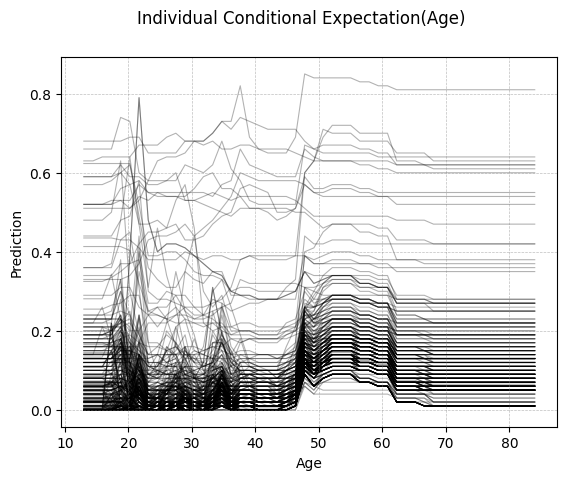

In [4]:
from python.src.utils import IndividualConditionalExpectation

ice = IndividualConditionalExpectation(
    model=rf_model,
    X=df_rfcc_preprocessed_sampled_X,
    var_names=["Age"],
    pred_type="classification",
)

ice.individual_conditional_expectation(
    var_name="Age",
    n_grid=50,
)
ice.plot_ice()

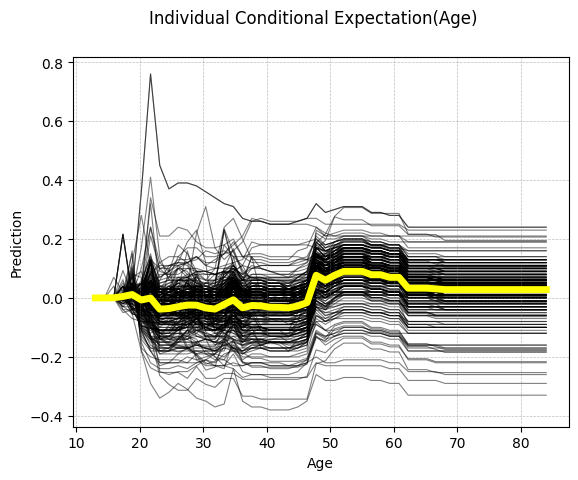

In [5]:
ice.plot_ice_with_average()

In [6]:
from python.src.preprocess import (
    preprocess_bike_data,
)

df_bike = pd.read_csv(config.data_dir / "bike-sharing-daily.csv")
df_bike_processed = preprocess_bike_data(df=df_bike)
assert df_bike.shape[0] == df_bike_processed.shape[0]


In [7]:
features_of_interest = [
    "days_since_2011",
    "temp",
    "season",
    "windspeed",
    "hum",
]
df_bike_processed["season"] = df_bike_processed["season"].map(
    {"WINTER": 1, "SPRING": 2, "SUMMER": 3, "FALL": 4}
)
X = df_bike_processed[features_of_interest]
y = df_bike_processed["cnt"]

X_sampled = X.sample(n=config.n_samples, random_state=config.seed)
tree_model = RandomForestRegressor(random_state=config.seed)
tree_model.fit(X, y)

RandomForestRegressor(random_state=42)

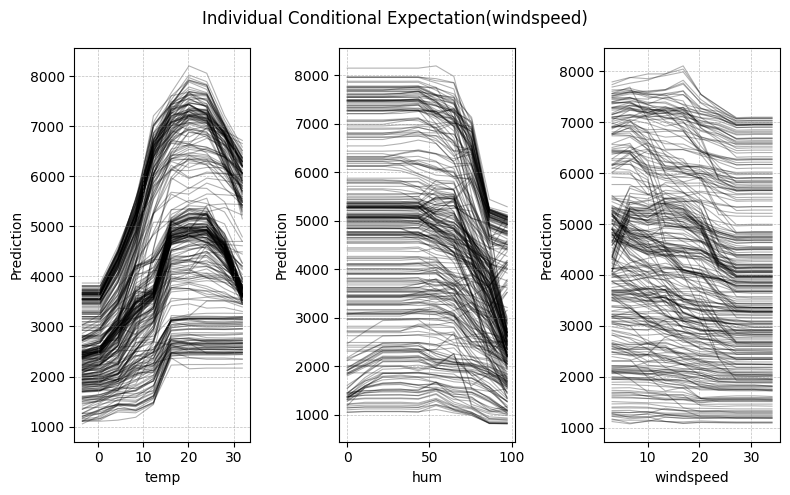

In [8]:
ice = IndividualConditionalExpectation(
    model=tree_model,
    X=X_sampled,
    var_names=["temp", "hum", "windspeed"],
    pred_type="regression",
)


fig, axes = plt.subplots(1, 3, figsize=(8, 5))
for i, (feature, ax) in enumerate(zip(["temp", "hum", "windspeed"], axes.ravel())):
    ice.individual_conditional_expectation(
        var_name=feature,
        n_grid=10,
    )
    ice.plot_ice(fig, ax)
fig.tight_layout()

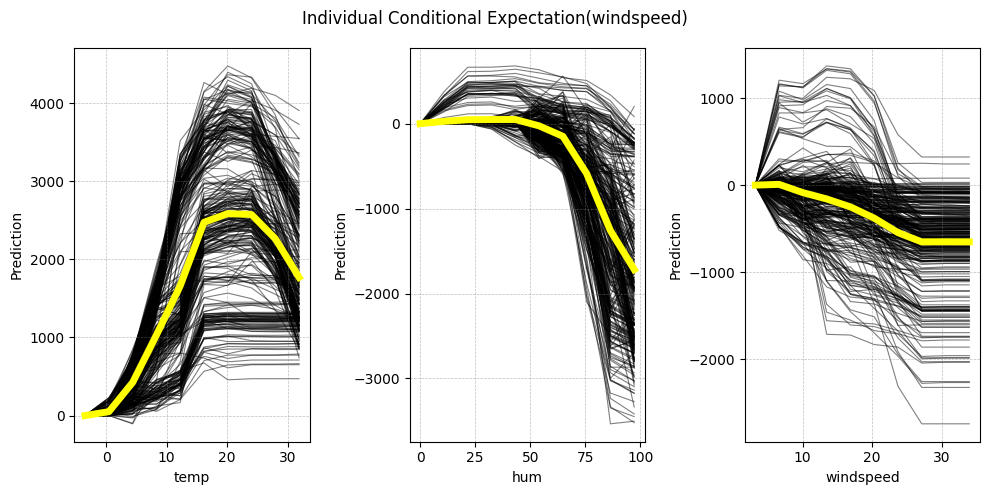

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(10, 5))
for i, (feature, ax) in enumerate(zip(["temp", "hum", "windspeed"], axes.ravel())):
    ice.individual_conditional_expectation(
        var_name=feature,
        n_grid=10,
    )
    ice.plot_ice_with_average(fig, ax)
fig.tight_layout()